In [1]:
#sinple CNN for healthy rice classification

import os
import pandas as pd
import numpy as np
import sys
import seaborn as sb
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

#batch specification
batch_size = 40
img_height = 200
img_width = 200

#loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
	'path/rice_plant_img',
	validation_split=0.1,
	subset = 'training',
	seed=42,
	image_size=(img_height,img_width),
	batch_size=batch_size
	)

#loading testing data 
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
	'path/rice_plant_img',
	validation_split =0.1,
	subset = 'validation', 
	seed=42,
	image_size=(img_height,img_width),
	batch_size=batch_size
	)

class_names = training_ds.class_names

Found 1007 files belonging to 2 classes.
Using 907 files for training.
Found 1007 files belonging to 2 classes.
Using 100 files for validation.


2022-01-20 07:57:53.969614: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2022-01-20 07:57:54.065958: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


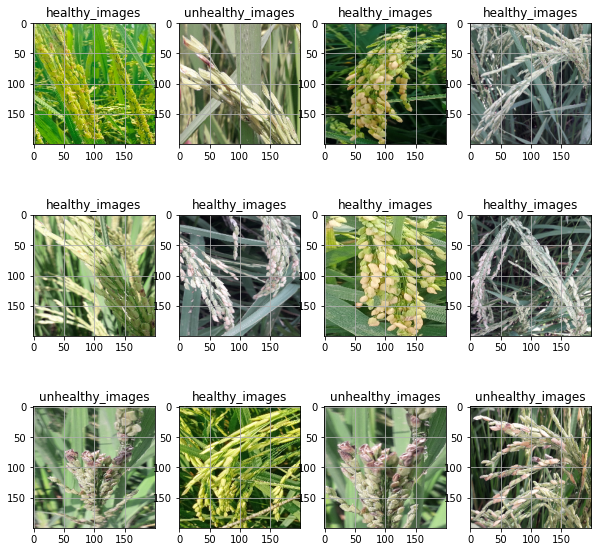

In [2]:
plt.figure(figsize=(10,10))
for images,labels in training_ds.take(1):
	for i in range(12):
		ax = plt.subplot(3,4,i+1)
		plt.imshow(images[i].numpy().astype('uint8'))
		plt.title(class_names[labels[i]])
		plt.grid(True)

Text(0.5, 1.0, 'healthy vs Unhealthy samples in data set')

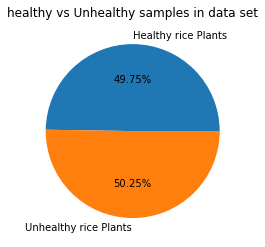

In [3]:
## healthy vs unhealthy samples in data set
healthy = os.listdir('path/rice_plant_img/healthy_images')
unhealthy = os.listdir('path/rice_plant_img/unhealthy_images')
plt.pie ([len(healthy), len(unhealthy)], labels = ['Healthy rice Plants', 
                                                                      'Unhealthy rice Plants'],autopct='%1.2f%%')
plt.title('healthy vs Unhealthy samples in data set')

In [4]:
## defining data augumentation layer
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  
  
])

In [5]:
#define CNN
MyCnn = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(1, activation= 'sigmoid')
])


MyCnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
#rescheduler

def scheduler(epoch,lr):
	if epoch<5:
		return lr
	else:
		return lr * tf.math.exp(-0.1)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [7]:
#training model
retVal = MyCnn.fit(training_ds,validation_data=testing_ds,callbacks=[callback],epochs=30)

Epoch 1/30
23/23 [==============================] - 27s 987ms/step - loss: 0.9839 - accuracy: 0.5094 - val_loss: 0.6896 - val_accuracy: 0.5400
Epoch 2/30
23/23 [==============================] - 26s 1s/step - loss: 0.6915 - accuracy: 0.5667 - val_loss: 0.7593 - val_accuracy: 0.4400
Epoch 3/30
23/23 [==============================] - 26s 989ms/step - loss: 0.6805 - accuracy: 0.5447 - val_loss: 0.7009 - val_accuracy: 0.4600
Epoch 4/30
23/23 [==============================] - 27s 1s/step - loss: 0.6611 - accuracy: 0.5899 - val_loss: 0.7135 - val_accuracy: 0.5400
Epoch 5/30
23/23 [==============================] - 27s 1s/step - loss: 0.6330 - accuracy: 0.6318 - val_loss: 0.6842 - val_accuracy: 0.5500
Epoch 6/30
23/23 [==============================] - 28s 1s/step - loss: 0.6089 - accuracy: 0.6527 - val_loss: 0.5860 - val_accuracy: 0.6500
Epoch 7/30
23/23 [==============================] - 28s 1s/step - loss: 0.5477 - accuracy: 0.7155 - val_loss: 0.6081 - val_accuracy: 0.6200
Epoch 8/30
23/

2022-01-20 09:24:00.364751: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 28 of 320
2022-01-20 09:24:00.364838: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 29 of 320
2022-01-20 09:24:00.364900: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 30 of 320
2022-01-20 09:24:00.382336: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 31 of 320
2022-01-20 09:24:00.405881: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 32 of 320
2022-01-20 09:24:00.405938: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 33 of 320
2022-01-20 09:24:00.405953: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this 

23/23 [==============================] - 3115s 141s/step - loss: 0.0681 - accuracy: 0.9791 - val_loss: 0.9272 - val_accuracy: 0.6600
Epoch 16/30
23/23 [==============================] - 4029s 135s/step - loss: 0.0517 - accuracy: 0.9879 - val_loss: 0.9747 - val_accuracy: 0.6600
Epoch 17/30
23/23 [==============================] - 1989s 90s/step - loss: 0.0386 - accuracy: 0.9923 - val_loss: 1.1479 - val_accuracy: 0.6300
Epoch 18/30


2022-01-20 11:22:13.234745: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 3 of 320
2022-01-20 11:22:13.234812: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 4 of 320
2022-01-20 11:22:13.234822: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 5 of 320
2022-01-20 11:22:13.234830: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 6 of 320
2022-01-20 11:22:13.234838: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 7 of 320
2022-01-20 11:22:13.234846: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 8 of 320
2022-01-20 11:22:13.258300: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may ta

23/23 [==============================] - 3047s 89s/step - loss: 0.0296 - accuracy: 0.9934 - val_loss: 1.1652 - val_accuracy: 0.6600
Epoch 19/30
23/23 [==============================] - 2888s 131s/step - loss: 0.0203 - accuracy: 0.9989 - val_loss: 1.2584 - val_accuracy: 0.6400
Epoch 20/30
23/23 [==============================] - 2960s 134s/step - loss: 0.0165 - accuracy: 0.9989 - val_loss: 1.3259 - val_accuracy: 0.6200
Epoch 21/30


2022-01-20 13:48:53.142029: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 209 of 320
2022-01-20 13:48:53.164977: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 210 of 320
2022-01-20 13:48:53.258305: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 211 of 320
2022-01-20 13:48:53.258346: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 212 of 320
2022-01-20 13:48:53.258355: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 213 of 320
2022-01-20 13:48:53.258365: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 214 of 320
2022-01-20 13:48:53.258371: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer 

23/23 [==============================] - 3111s 97s/step - loss: 0.0141 - accuracy: 0.9978 - val_loss: 1.3629 - val_accuracy: 0.6400
Epoch 22/30


2022-01-20 14:27:49.457813: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 101 of 320
2022-01-20 14:27:49.457862: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 102 of 320
2022-01-20 14:27:49.457870: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 103 of 320
2022-01-20 14:27:49.457876: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 104 of 320
2022-01-20 14:27:49.457884: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 105 of 320
2022-01-20 14:27:49.457890: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 106 of 320
2022-01-20 14:27:49.457897: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer 

23/23 [==============================] - 993s 36s/step - loss: 0.0123 - accuracy: 0.9978 - val_loss: 1.3272 - val_accuracy: 0.6200
Epoch 23/30
23/23 [==============================] - 27s 1s/step - loss: 0.0111 - accuracy: 0.9978 - val_loss: 1.3766 - val_accuracy: 0.6200
Epoch 24/30
23/23 [==============================] - 26s 989ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 1.3917 - val_accuracy: 0.6400
Epoch 25/30
23/23 [==============================] - 26s 981ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 1.4241 - val_accuracy: 0.6100
Epoch 26/30
23/23 [==============================] - 26s 985ms/step - loss: 0.0075 - accuracy: 0.9989 - val_loss: 1.3979 - val_accuracy: 0.6200
Epoch 27/30
23/23 [==============================] - 24s 891ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.3997 - val_accuracy: 0.6300
Epoch 28/30
23/23 [==============================] - 23s 876ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 1.4353 - val_accuracy: 0.6400
Epoch 29

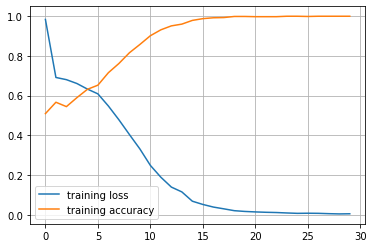

In [8]:
import matplotlib.pyplot as plt
plt.plot(retVal.history['loss'],label='training loss')
plt.plot(retVal.history['accuracy'],label='training accuracy')
plt.legend()
plt.grid(True)

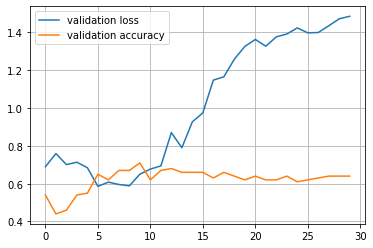

In [9]:
plt.plot(retVal.history['val_loss'],label='validation loss')
plt.plot(retVal.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.grid(True)

[[9.99609828e-01]
 [1.02661252e-02]
 [1.04093313e-01]
 [1.43303871e-02]
 [9.98581767e-01]
 [9.99995708e-01]
 [2.17508731e-08]
 [8.91942978e-01]
 [7.69843161e-02]
 [1.30129546e-01]
 [1.66772008e-02]
 [3.54604125e-02]
 [1.99854374e-04]
 [9.98286366e-01]
 [9.16723251e-01]
 [9.96207654e-01]
 [4.18996811e-03]
 [9.34670568e-01]
 [2.42601931e-02]
 [4.60266382e-01]
 [7.59780407e-04]
 [6.41503394e-01]
 [2.28661948e-14]
 [4.15882766e-02]
 [8.88347626e-04]
 [1.08767188e-06]
 [9.99950707e-01]
 [1.40613914e-02]
 [1.85940862e-02]
 [5.39054135e-09]
 [1.57923002e-12]
 [3.57672366e-06]
 [1.22636646e-01]
 [8.98213029e-01]
 [2.48161491e-10]
 [9.48697329e-04]
 [9.99835253e-01]
 [9.99905348e-01]
 [1.87912406e-08]
 [8.96871090e-03]]
[[9.99609828e-01]
 [1.02661252e-02]
 [1.04093313e-01]
 [1.43303871e-02]
 [9.98581767e-01]
 [9.99995708e-01]
 [2.17508731e-08]
 [8.91942978e-01]
 [7.69843161e-02]
 [1.30129546e-01]
 [1.66772008e-02]
 [3.54604125e-02]
 [1.99854374e-04]
 [9.98286366e-01]
 [9.16723251e-01]
 [9.96207

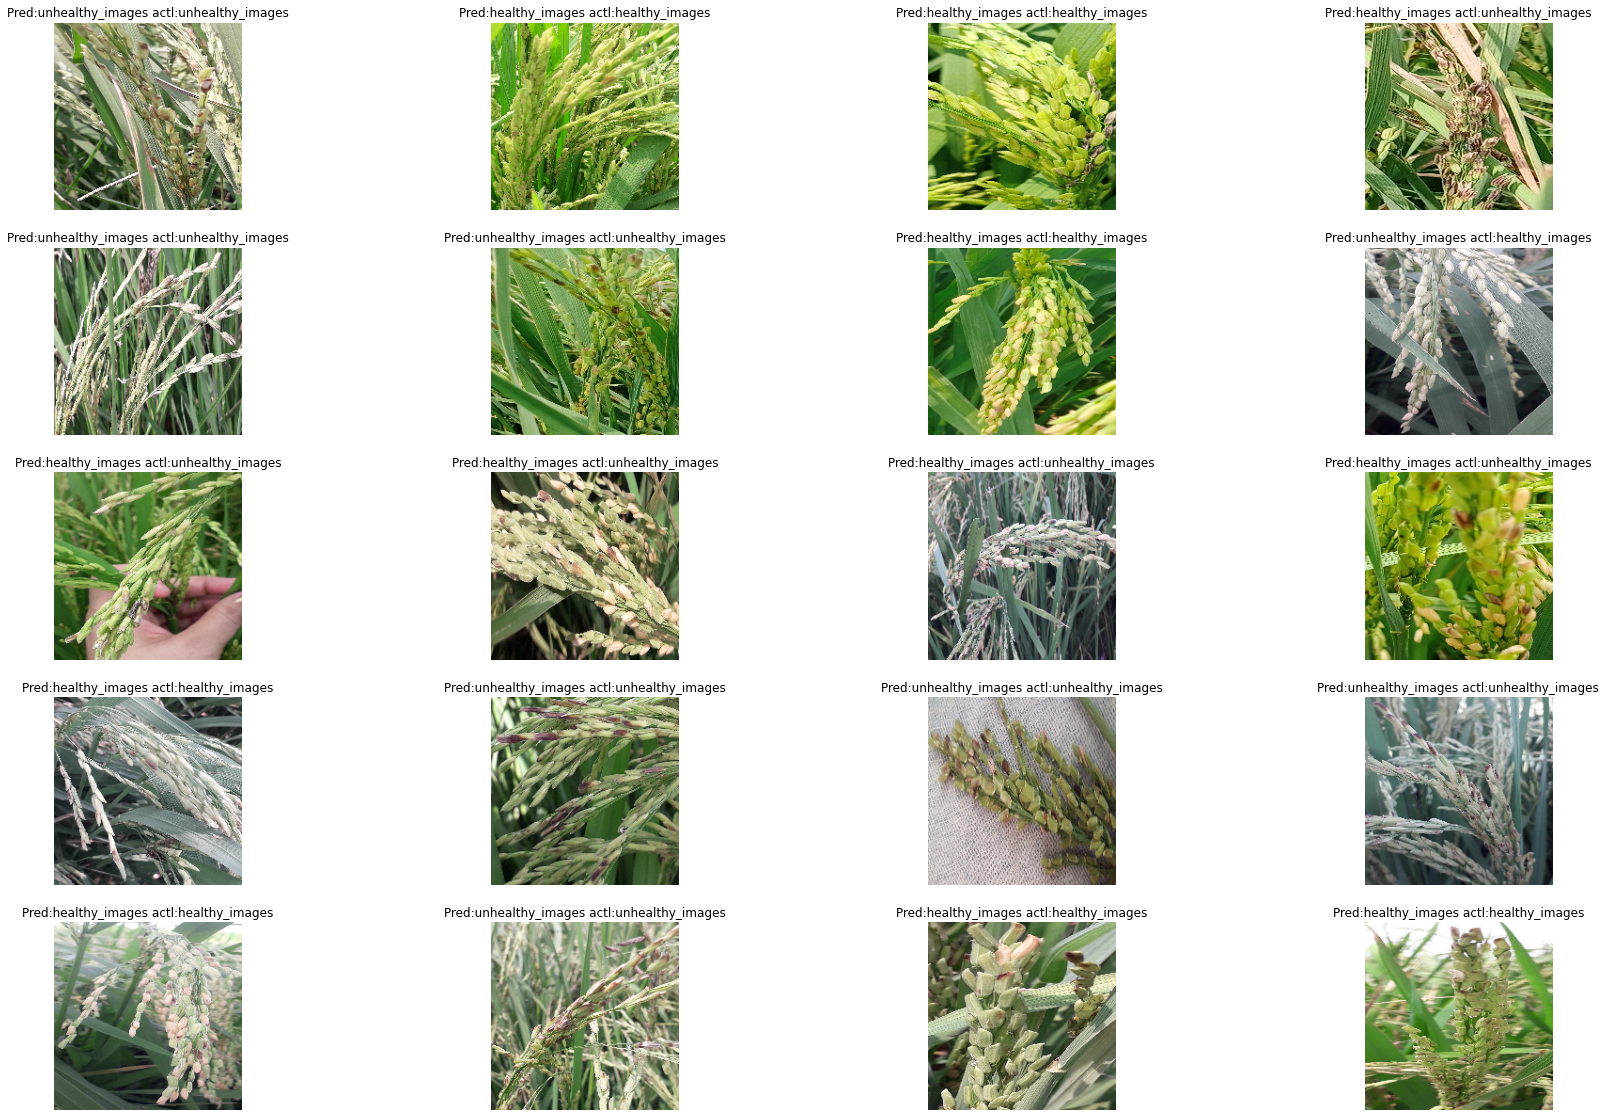

In [10]:
AccuracyVector=[]
plt.figure(figsize=(30,20))
for images,labels in testing_ds.take(1):
	predictions = MyCnn.predict(images)
	predlabel=[]
	prdlbl=[]

	for mem in predictions:
		predlabel.append(class_names[int(round(mem[0]))])
		prdlbl.append(np.argmax(mem))
		print(predictions)
	
	AccuracyVector=np.array(prdlbl)==labels

	for i in range(20):
		ax=plt.subplot(5,4,i+1)
		plt.imshow(images[i].numpy().astype('uint8'))
		plt.title('Pred:'+predlabel[i]+' actl:'+class_names[labels[i]])
		plt.axis('off')
		plt.grid(True)



In [11]:
from keras.utils.vis_utils import plot_model
plot_model(MyCnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [12]:
MyCnn.save('model1.h5')

In [13]:
from PIL import Image
imsize=(200,200)

img=Image.open('static/1.png')
img=img.convert('RGB')
img=img.resize(imsize)



img = np.asarray(img)




prd=MyCnn.predict(np.array([img]))
print(prd)
#predlabel=class_names[int(round(prd))]
prdlbl=np.argmax(prd)

print(prd)

FileNotFoundError: [Errno 2] No such file or directory: 'static/1.png'